<div id="container" style="position:relative;">
<div style="float:left"><h1>  Clustering Codealong </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

Clustering is widely used in the data industry. It is commonly used to find some kind of group structure in the data, if it exists. Once the groups of similar data points are found, these clusters are further explored to discover any patterns or commonalities that characterize the cluster. 

This process is very useful when dealing with transactional data. If we have information on customers' spending, we can use clustering to find possible groups of customers with similar purchasing patterns (e.g. risky and conservative spenders). 

The data we analyze contains usage behavior of about 9,000 active credit card holders during a period of 6 months. There are 18 features describing different behaviors of customers (Description taken from Kaggle):

<table>
  <tr>
    <th style="text-align: left; background: lightgrey">Column Name</th>
    <th style="text-align: left; background: lightgrey">Column Contents</th>
  </tr>
  <tr>
    <td style="text-align: left"> <code>CUST_ID</code> </td>
    <td style="text-align: left">Identification of credit card holder</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>BALANCE</code></td>
    <td style="text-align: left">Balance amount left in their account to make purchases</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>BALANCE_FREQUENCY</code></td>
    <td style="text-align: left">How frequently the balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>PURCHASES</code></td>
    <td style="text-align: left">Amount of purchases made from account</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>ONEOFF_PURCHASES</code></td>
    <td style="text-align: left">Maximum purchase amount done in one-go</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>INSTALLMENTS_PURCHASES</code></td>
    <td style="text-align: left">Amount of purchase done in installment</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>CASH_ADVANCE</code></td>
    <td style="text-align: left">Cash in advance given by the user</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>PURCHASES_FREQUENCY</code></td>
    <td style="text-align: left">How frequently the purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>ONEOFF_PURCHASES_FREQUENCY</code></td>
    <td style="text-align: left">How frequently purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>PURCHASES_INSTALLMENTS_FREQUENCY</code></td>
    <td style="text-align: left">How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>CASH_ADVANCE_FREQUENCY</code></td>
    <td style="text-align: left">How frequently the cash in advance being paid</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>CASH_ADVANCE_TRX</code></td>
    <td style="text-align: left">Number of transactions made with "Cash in Advanced" </td>
  </tr>
  <tr>
    <td style="text-align: left"><code>PURCHASES_TRX</code></td>
    <td style="text-align: left">Number of purchase transactions made</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>CREDIT_LIMIT</code></td>
    <td style="text-align: left">Limit of credit card for user </td>
  </tr>
  <tr>
    <td style="text-align: left"><code>PAYMENTS</code></td>
    <td style="text-align: left">Amount of payment done by user </td>
  </tr>
  <tr>
    <td style="text-align: left"><code>MINIMUM_PAYMENTS</code></td>
    <td style="text-align: left">Minimum amount of payments made by user </td>
  </tr>
  <tr>
    <td style="text-align: left"><code>PRC_FULL_PAYMENT</code></td>
    <td style="text-align: left">Percent of full payment paid by user </td>
  </tr>
  <tr>
    <td style="text-align: left"><code>TENURE</code></td>
    <td style="text-align: left">Tenure of credit card service for user</td>
  </tr>
</table>


## Preprocessing

Let's read in the data and look at the size and some summary statistics, as well as some plots. 

- Do we have to deal with missing data?
- Are any of the features really skewed? Can we transform them?
- Is scaling required for this data set?
- EDA

In [64]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Tools
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
# Look at a dendogram for hierarchical 
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from scipy import stats


In [63]:
# np.log(df + 1)

In [3]:
# import dataset
df = pd.read_csv("CC_GENERAL.csv")

In [6]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [7]:
df.shape

(8950, 18)

In [10]:
df.index = df['CUST_ID']

In [13]:
df = df.drop(columns=['CUST_ID'])

In [14]:
df.index

Index(['C10001', 'C10002', 'C10003', 'C10004', 'C10005', 'C10006', 'C10007',
       'C10008', 'C10009', 'C10010',
       ...
       'C19181', 'C19182', 'C19183', 'C19184', 'C19185', 'C19186', 'C19187',
       'C19188', 'C19189', 'C19190'],
      dtype='object', name='CUST_ID', length=8950)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [16]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [21]:
sum(df.isnull().any(axis =1))

314

In [22]:
df.isnull().any()

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [25]:
df['MINIMUM_PAYMENTS'].isnull().sum()

313

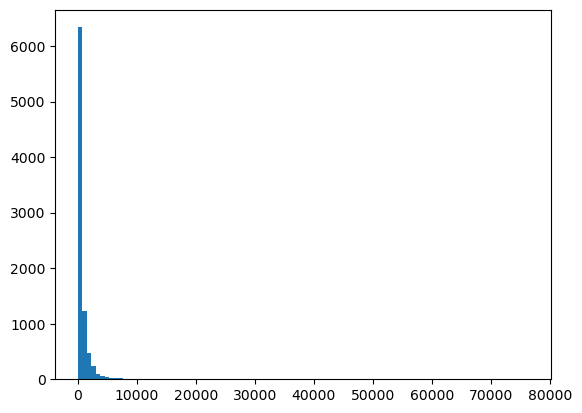

In [27]:
plt.hist(df['MINIMUM_PAYMENTS'], bins =100)
plt.show()

In [28]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [31]:
df.loc[df['PAYMENTS']==0 & df['MINIMUM_PAYMENTS'].isnull(), :][['PAYMENTS', 'MINIMUM_PAYMENTS']]

,PAYMENTS,MINIMUM_PAYMENTS
CUST_ID,,
C10004,0.0,NaN
C10047,0.0,NaN
C10049,0.0,NaN
C10057,0.0,NaN
C10058,0.0,NaN
...,...,...
C19095,0.0,NaN
C19160,0.0,NaN
C19170,0.0,NaN


In [ ]:
# replacing the null values in min_paymentws as 0 for payments 0 


In [33]:
df.loc[df['PAYMENTS']==0 & df['MINIMUM_PAYMENTS'].isnull(), 'MINIMUM_PAYMENTS'] = 0

In [34]:
df['MINIMUM_PAYMENTS'].isnull().sum()

73

In [35]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

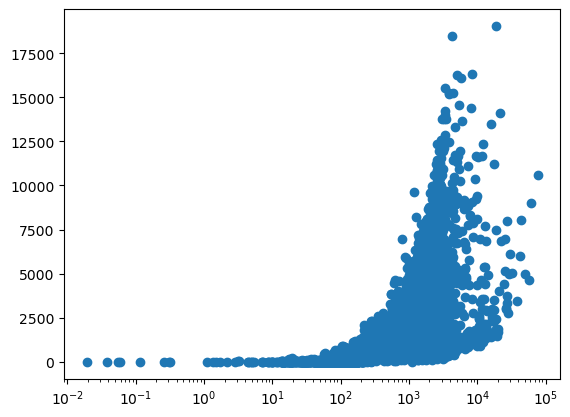

In [38]:
# lets check how BALANCE is related to MIN_payments
plt.scatter(df.MINIMUM_PAYMENTS, df.BALANCE)
plt.xscale('log')

In [39]:
df['MINIMUM_PAYMENTS']/df['BALANCE']

CUST_ID
C10001    3.410935
C10002    0.334848
C10003    0.251402
C10004    0.000000
C10005    0.299360
            ...   
C19186    1.715701
C19187         NaN
C19188    3.522352
C19189    4.143070
C19190    0.236885
Length: 8950, dtype: float64

In [40]:
(df['MINIMUM_PAYMENTS']/df['BALANCE']).median()

0.4449815141788248

In [44]:
df.loc[df['MINIMUM_PAYMENTS'].isnull(), 'MINIMUM_PAYMENTS']  = df.loc[df['MINIMUM_PAYMENTS'].isnull(), 'BALANCE'] *0.445

In [46]:
df['MINIMUM_PAYMENTS'].isnull().sum()

0

In [47]:
df.isnull().any()

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [48]:
df['CREDIT_LIMIT'].isnull().sum()

1

In [50]:
df = df.dropna()

In [51]:
df.isnull().any()

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

### Exploratoray analysis
- typically we would do this on training set
- even filling null values would happen on training set alone
- this is unsupervised learning, we dont have any train/test set **


** you can still reserve some subset of data for more validation of results

BALANCE


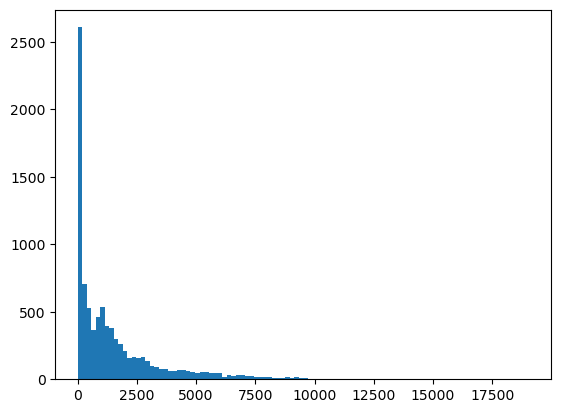

BALANCE_FREQUENCY


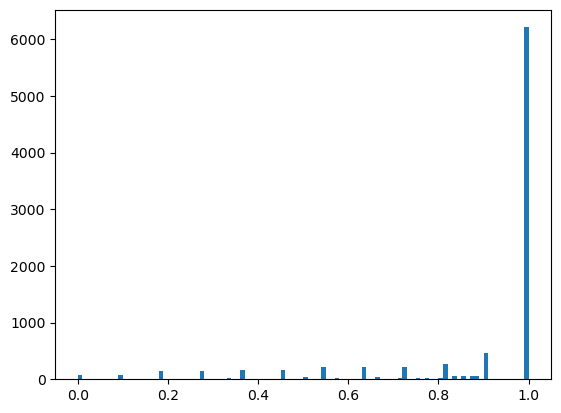

PURCHASES


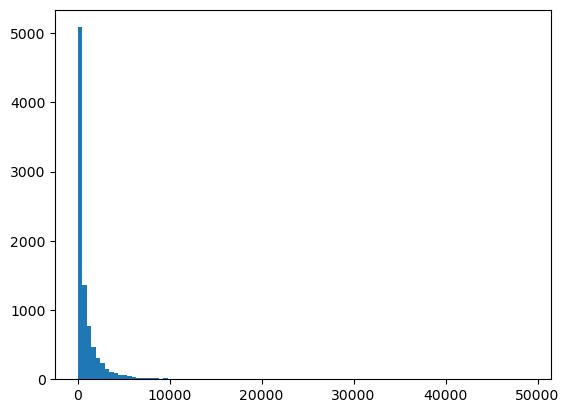

ONEOFF_PURCHASES


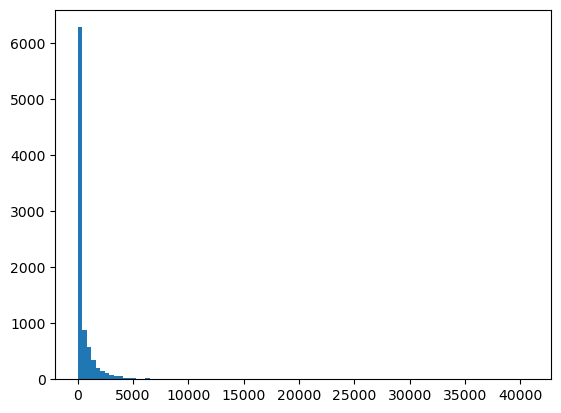

INSTALLMENTS_PURCHASES


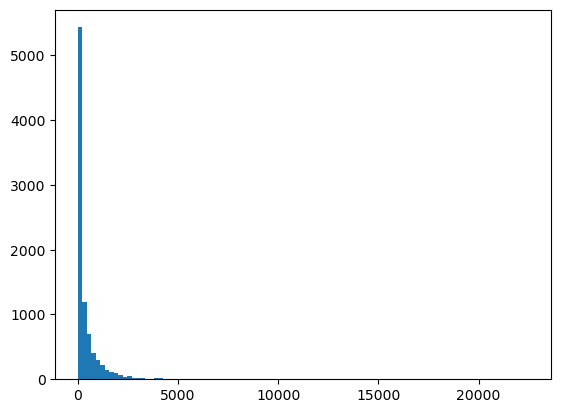

CASH_ADVANCE


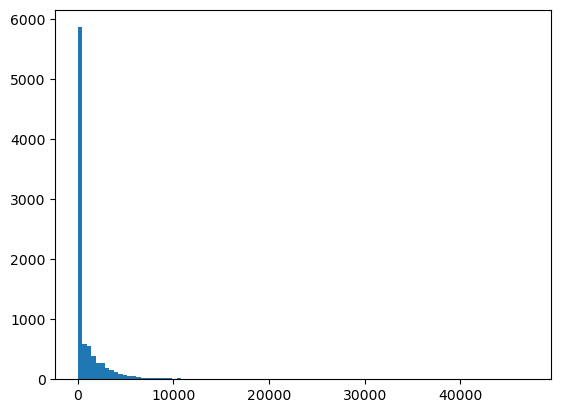

PURCHASES_FREQUENCY


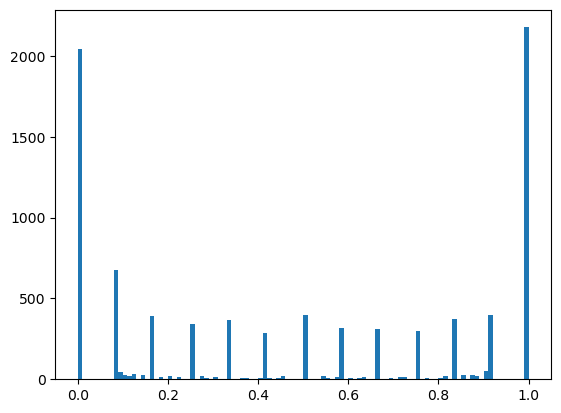

ONEOFF_PURCHASES_FREQUENCY


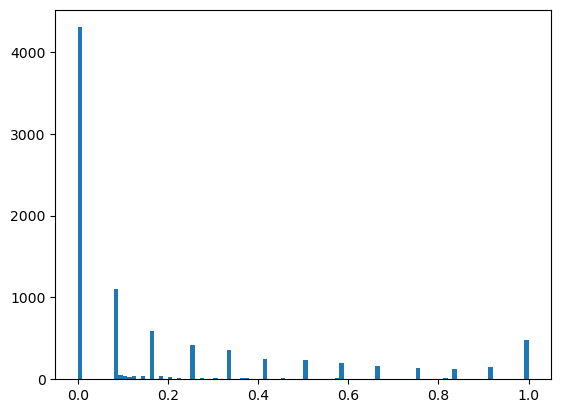

PURCHASES_INSTALLMENTS_FREQUENCY


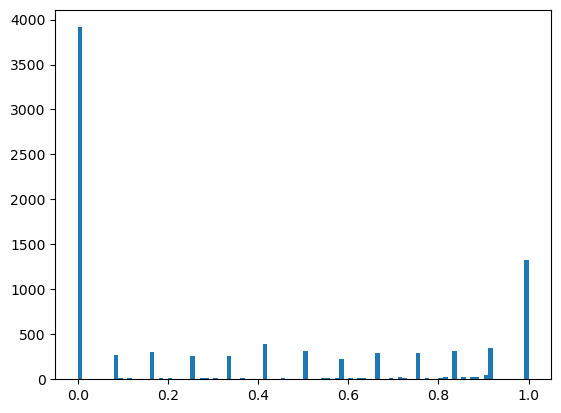

CASH_ADVANCE_FREQUENCY


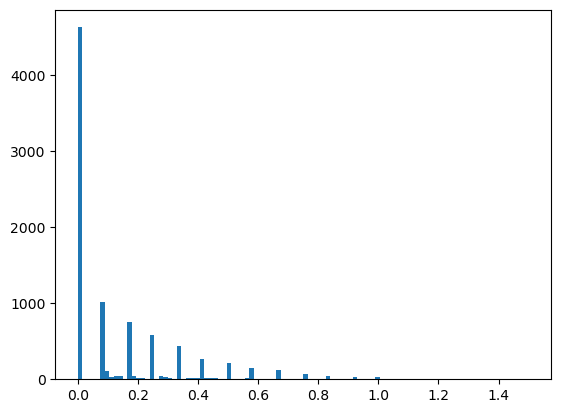

CASH_ADVANCE_TRX


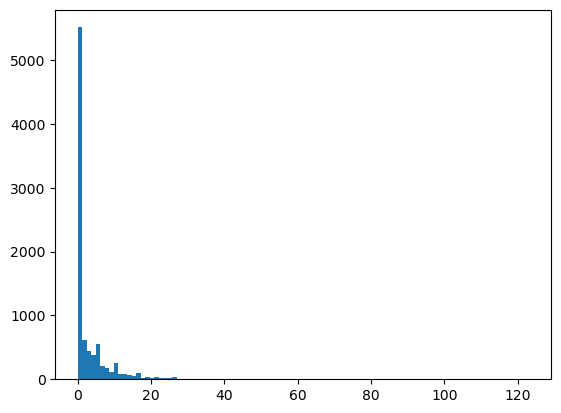

PURCHASES_TRX


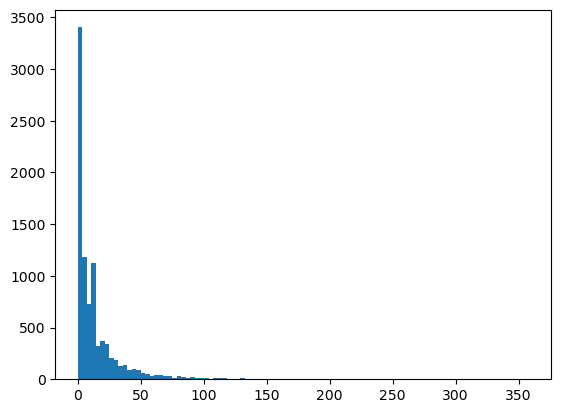

CREDIT_LIMIT


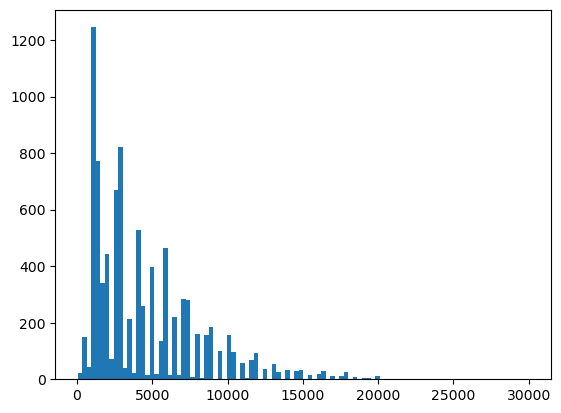

PAYMENTS


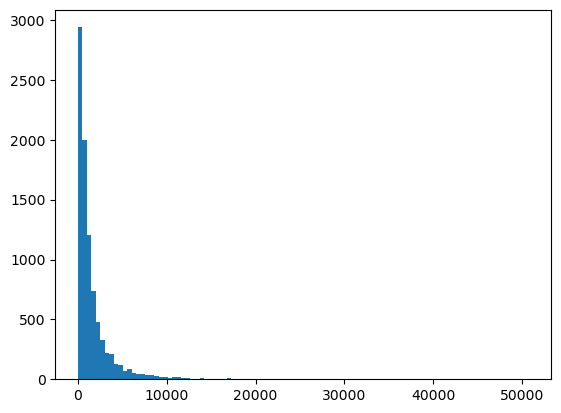

MINIMUM_PAYMENTS


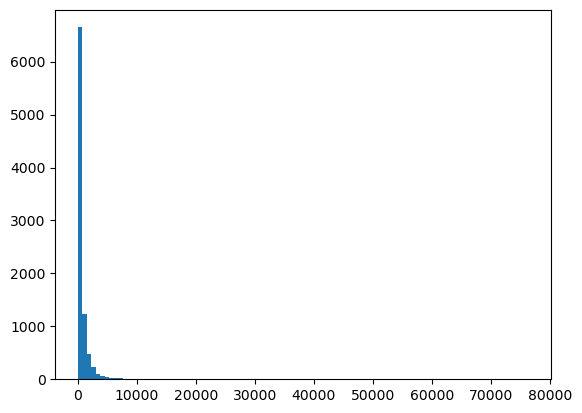

PRC_FULL_PAYMENT


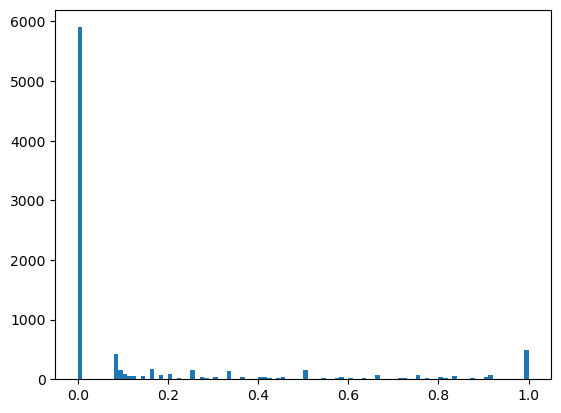

TENURE


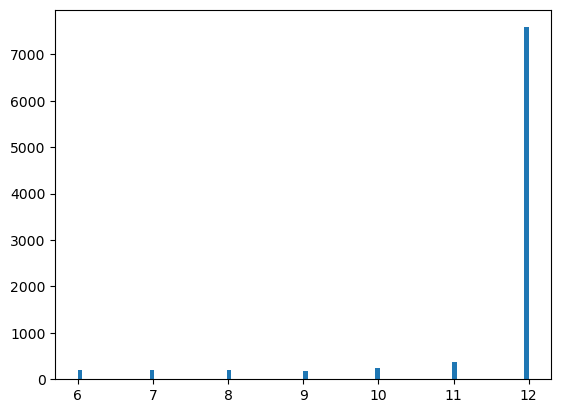

In [53]:
for column in df.columns:
    print(column)
    plt.hist(df[column], bins = 100)
    plt.show()

In [57]:
df_transformed = np.log(df + 1)

BALANCE


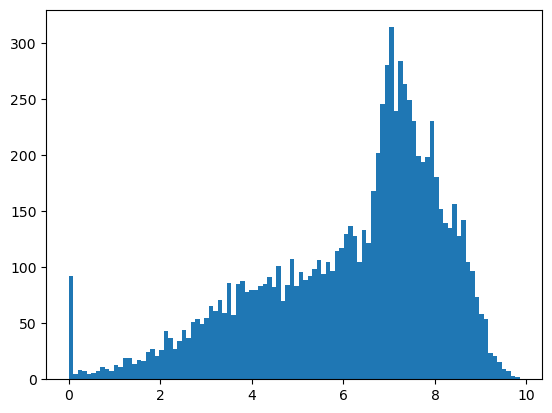

BALANCE_FREQUENCY


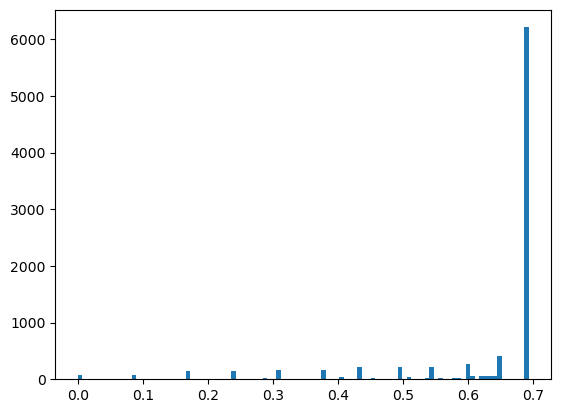

PURCHASES


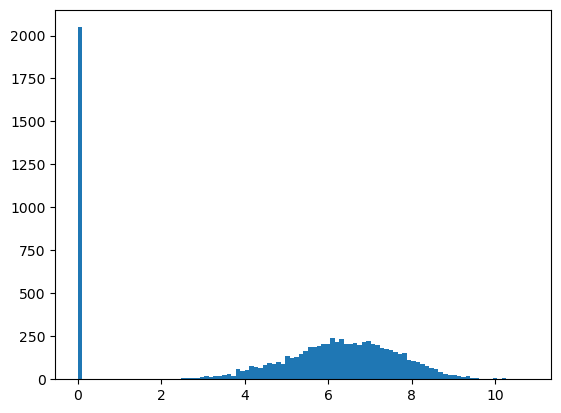

ONEOFF_PURCHASES


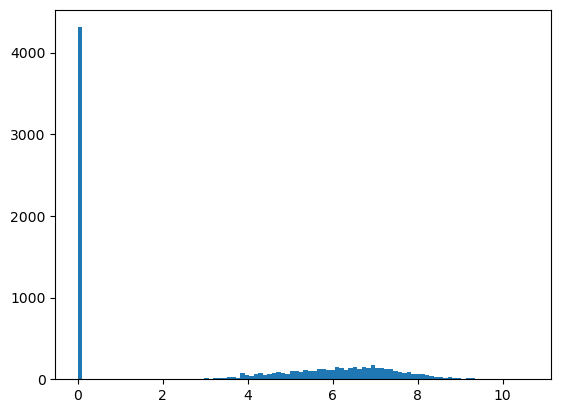

INSTALLMENTS_PURCHASES


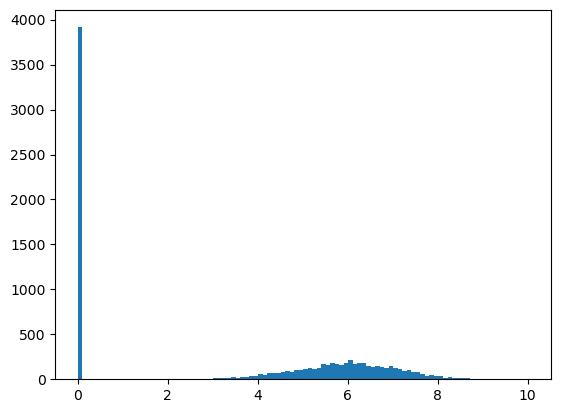

CASH_ADVANCE


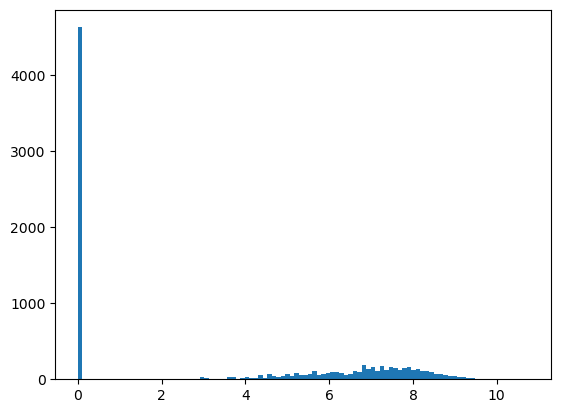

PURCHASES_FREQUENCY


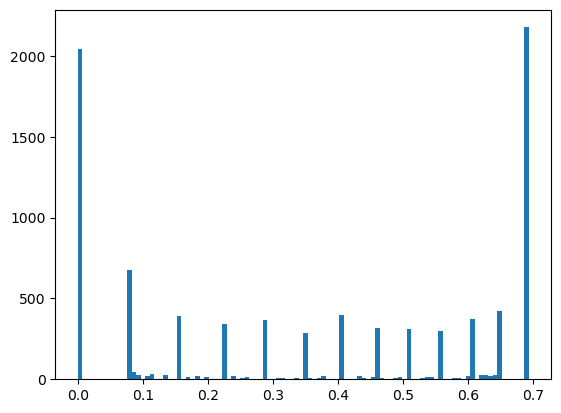

ONEOFF_PURCHASES_FREQUENCY


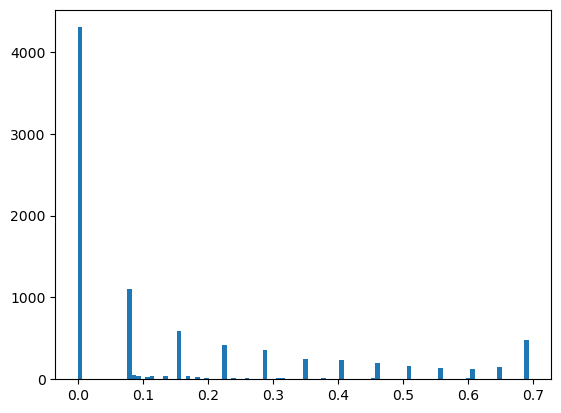

PURCHASES_INSTALLMENTS_FREQUENCY


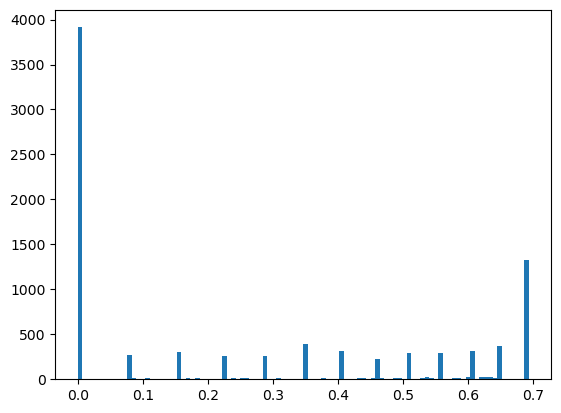

CASH_ADVANCE_FREQUENCY


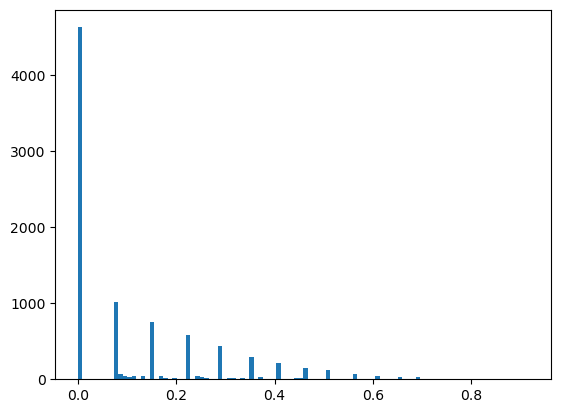

CASH_ADVANCE_TRX


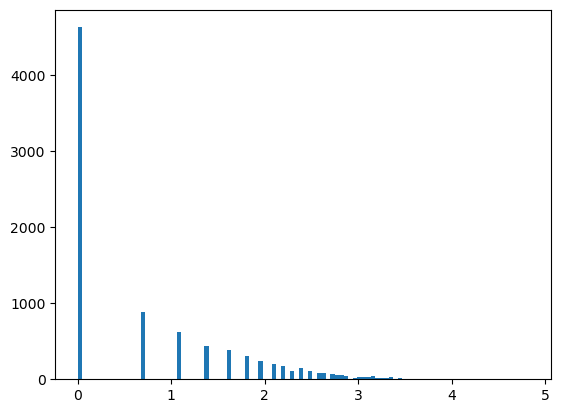

PURCHASES_TRX


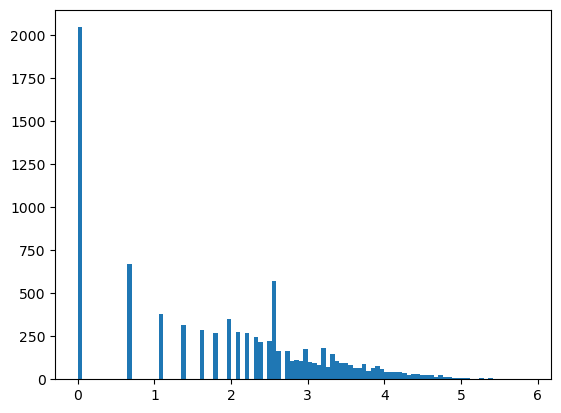

CREDIT_LIMIT


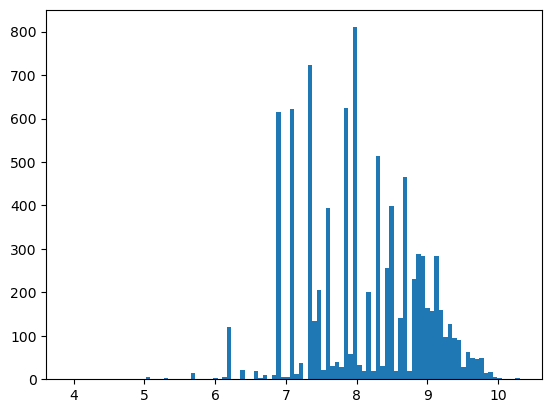

PAYMENTS


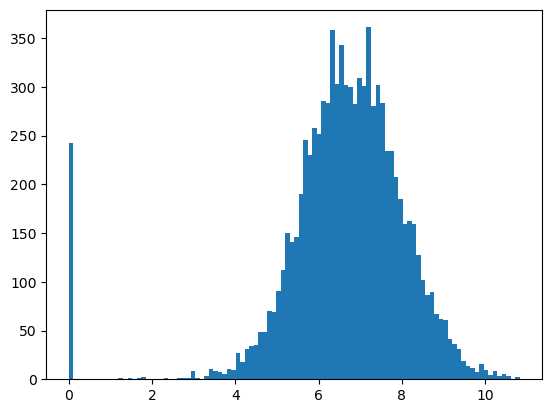

MINIMUM_PAYMENTS


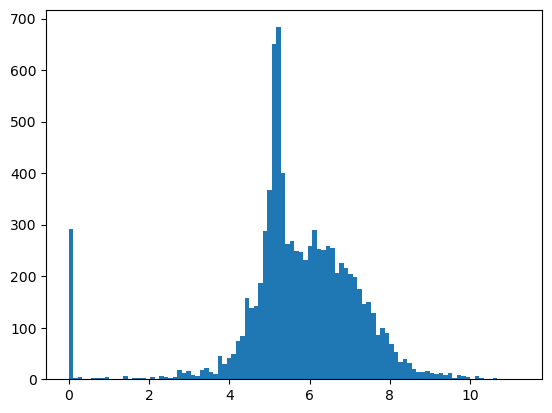

PRC_FULL_PAYMENT


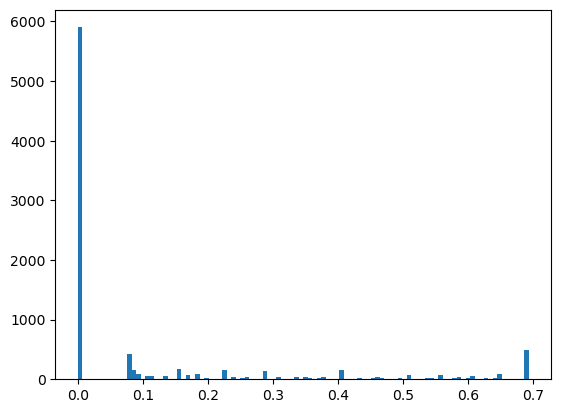

TENURE


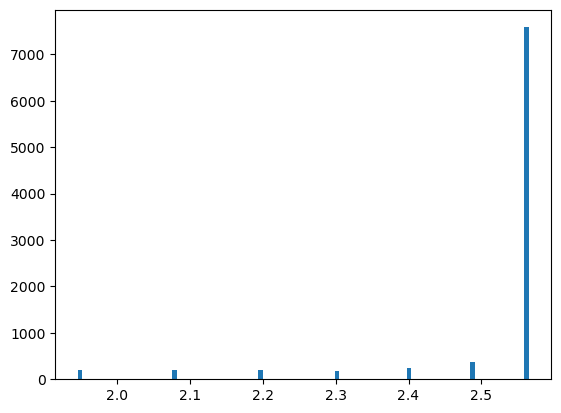

In [58]:
for column in df_transformed.columns:
    print(column)
    plt.hist(df_transformed[column], bins = 100)
    plt.show()

In [84]:
df_scaled = df_transformed.copy()

for column in df_transformed.columns:
    scaler = StandardScaler()
    df_scaled[column] = scaler.fit_transform(df_transformed[column].ravel().reshape(-1,1))

In [71]:
# df['BALANCE'].ravel().reshape(-1,1).shape

(8949, 1)

In [72]:
df['BALANCE'].shape

(8949,)

In [74]:
type(df['BALANCE'])

pandas.core.series.Series

In [76]:
type(df[column].ravel().reshape(-1,1))

numpy.ndarray

In [82]:
df['MINIMUM_PAYMENTS'].to_numpy()

array([ 139.509787, 1072.340217,  627.284787, ...,   82.418369,
         55.755628,   88.288956])

In [79]:
df['BALANCE'].ravel()

array([  40.900749, 3202.467416, 2495.148862, ...,   23.398673,
         13.457564,  372.708075])

BALANCE


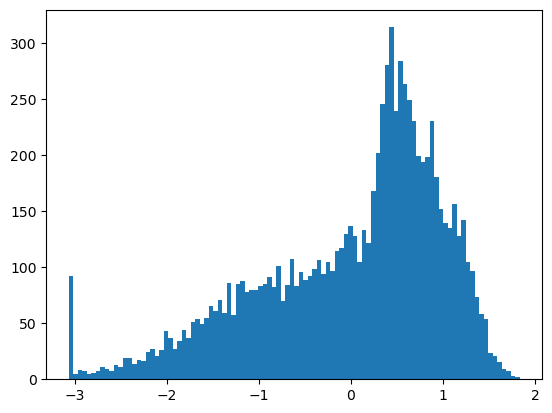

BALANCE_FREQUENCY


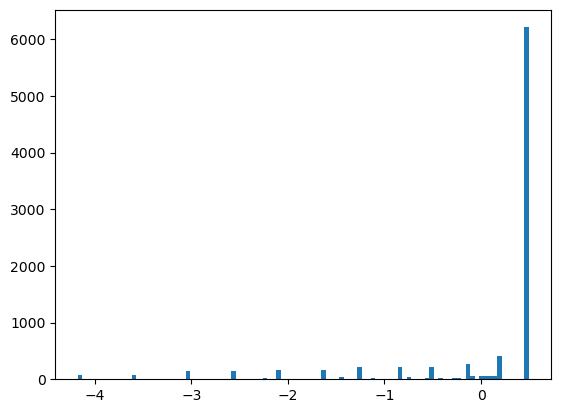

PURCHASES


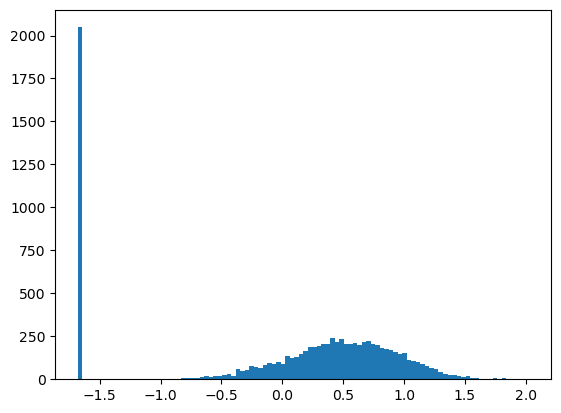

ONEOFF_PURCHASES


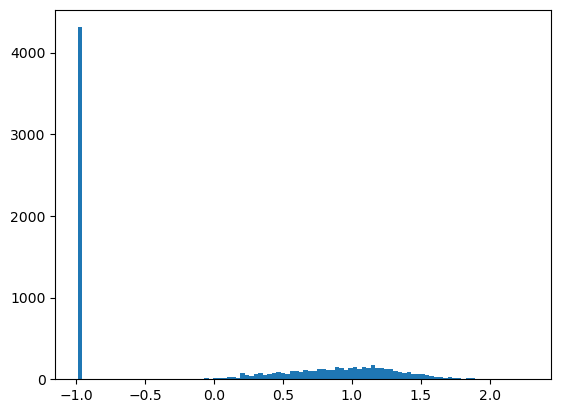

INSTALLMENTS_PURCHASES


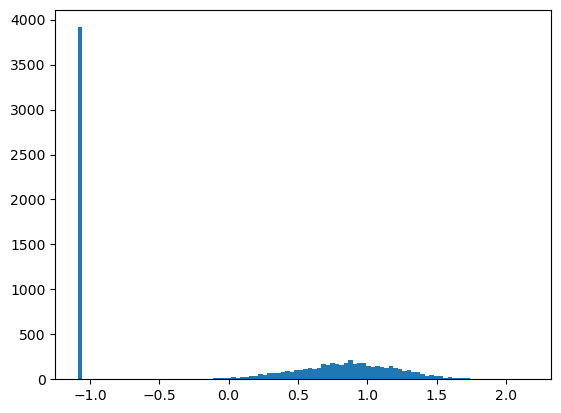

In [85]:
for column in df_scaled.columns[:5]:
    print(column)
    plt.hist(df_scaled[column], bins = 100)
    plt.show()

### Dimensionality reduction 
- For visual analysis in reduced dimensions
- to visually estimate number of clusters/ different patterns

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Tools
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
# Look at a dendogram for hierarchical 
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [93]:
model  = PCA(n_components=3)
pca_transformed  = model.fit_transform(df_scaled)

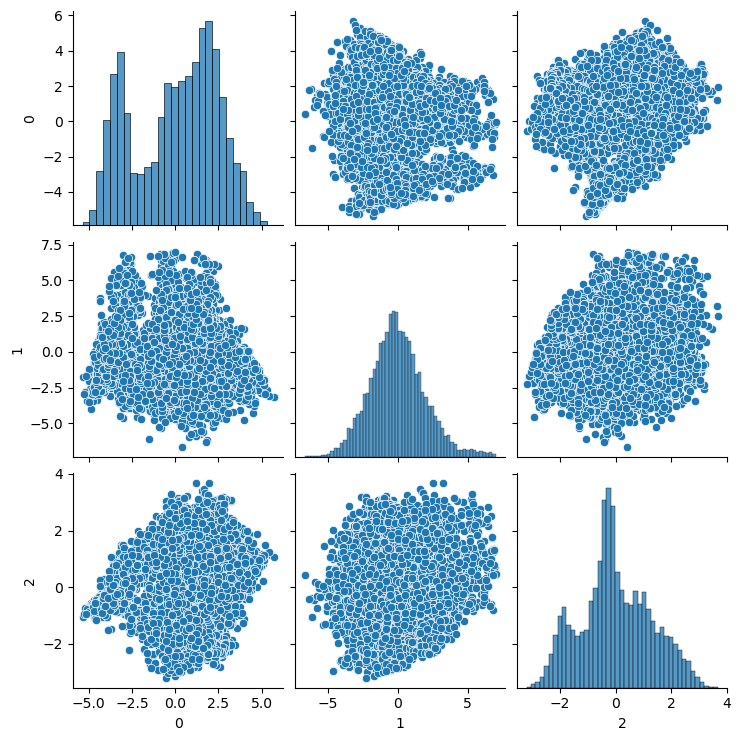

In [94]:
sns.pairplot(pd.DataFrame(pca_transformed))

In [95]:
model = TSNE(n_components=3)
tsne_transformed = model.fit_transform(df_scaled)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [96]:
df_tsne = pd.DataFrame(tsne_transformed)

In [97]:
df_tsne

,0,1,2
0,3.971367,-21.202141,-6.331325
1,-15.771673,3.063262,9.148125
2,11.258486,-5.073921,14.942862
3,-14.248615,-0.659682,-17.673500
4,-0.154994,-8.201741,21.324173
...,...,...,...
8944,2.457117,1.885167,-17.905064
8945,3.041602,2.360479,-15.084802
8946,2.246633,1.620233,-16.179962
8947,-7.648183,2.152941,-7.256853


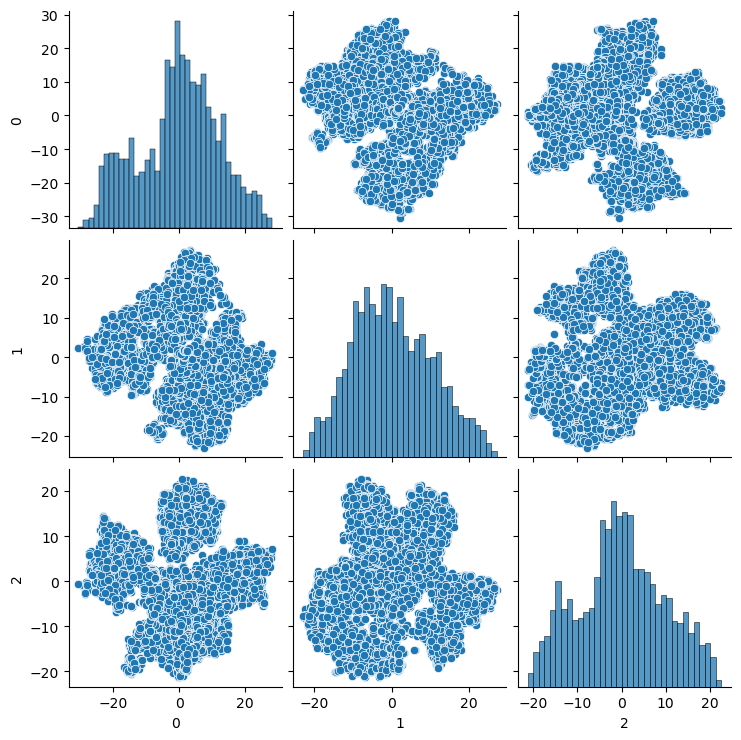

In [98]:
sns.pairplot(df_tsne)

## Clustering

Let's use some of the clustering methods on this data set. For each, we'll have to decide how many clusters would be appropriate.

- K-means 
- Density Based Clustering (DBSCAN)
- Hierarchical Clustering

In [99]:
from sklearn.cluster import DBSCAN, KMeans

#### Kmeans

In [100]:
clusters = []
inertia = []
sil_score = []

for k in range(2,12): 
    kmeans_model = KMeans(n_clusters=k)
    labels = kmeans_model.fit_predict(df_scaled)
    inertia.append(kmeans_model.inertia_)
    clusters.append(k)
    sil_score.append(silhouette_score(df_scaled, labels))

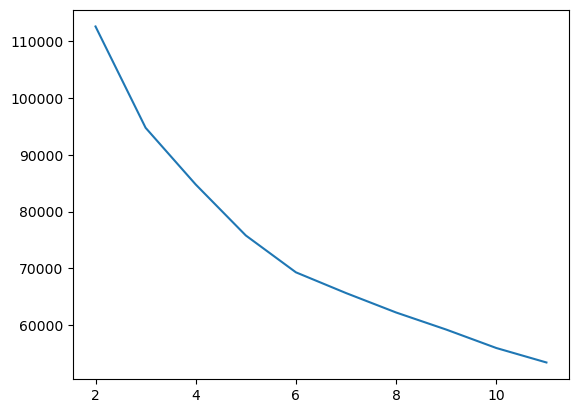

In [102]:
#inertia  plot
plt.plot(clusters, inertia)

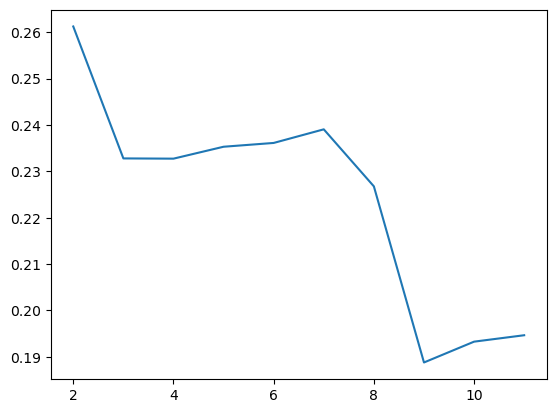

In [103]:
# sil score
plt.plot(clusters, sil_score)

In [115]:
kmeans_model = KMeans(2)
kmeans_labels = kmeans_model.fit_predict(df_scaled)

In [116]:
df_tsne_kmeans = df_tsne.copy()

In [117]:
df_tsne_kmeans['kmeans_labels'] = kmeans_labels

In [118]:
df_tsne_kmeans.head()

,0,1,2,kmeans_labels
0,3.971367,-21.202141,-6.331325,0
1,-15.771673,3.063262,9.148125,1
2,11.258486,-5.073921,14.942862,0
3,-14.248615,-0.659682,-17.673500,1
4,-0.154994,-8.201741,21.324173,1


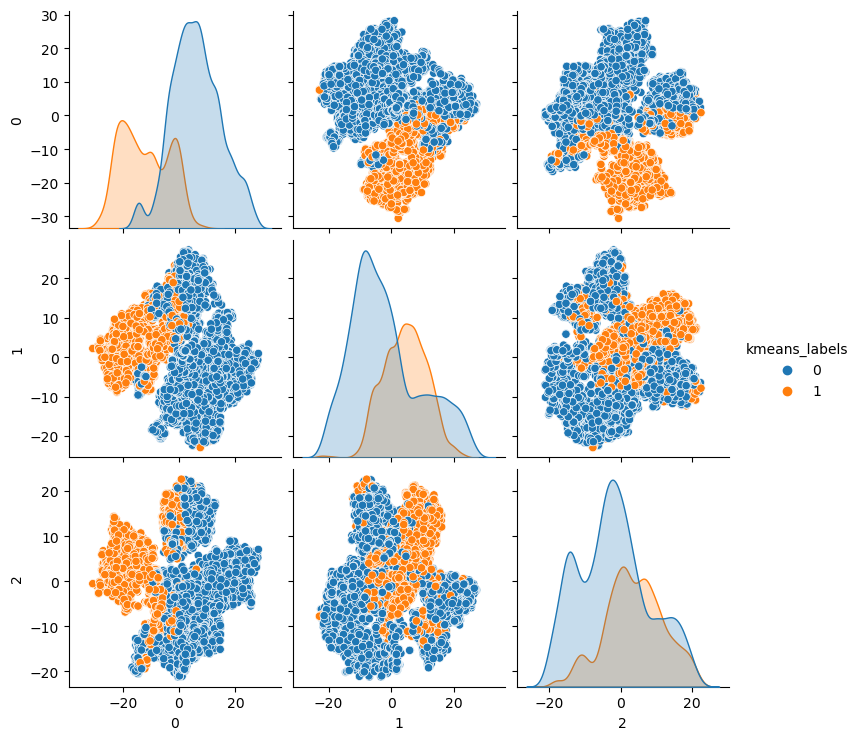

In [119]:
sns.pairplot(df_tsne_kmeans, hue = 'kmeans_labels')

Lets start with 2 clusters for kmeans and maybe we can have 3

#### DBSCAN

In [124]:
clusters = []
# inertia = []
sil_score = []
epsilons = list(np.arange(1.5, 3, 0.1)
               )

for k in epsilons: 
    dbscan_model = DBSCAN(eps=k)
    labels = dbscan_model.fit_predict(df_scaled)
    # inertia.append(kmeans_model.inertia_)
    cluster =  sum(np.unique(labels)!=-1)
    clusters.append(cluster)
    sil_score.append(silhouette_score(df_scaled, labels))

In [125]:
clusters

[16, 12, 15, 12, 8, 8, 5, 2, 1, 2, 1, 1, 1, 1, 1]

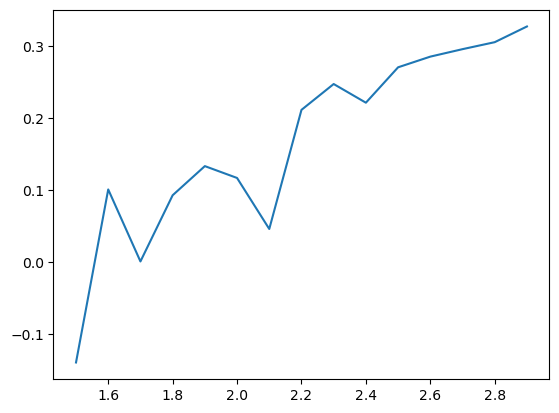

In [126]:
plt.plot(epsilons, sil_score)

In [148]:
dbscan_model = DBSCAN(eps=  2.2, min_samples=8)
dbscan_labels = dbscan_model.fit_predict(df_scaled)

In [149]:
df_tsne_dbscan = df_tsne.copy()

In [150]:
df_tsne_dbscan['dbscan_labels'] = dbscan_labels

In [151]:
df_tsne_dbscan.head()

,0,1,2,dbscan_labels
0,3.971367,-21.202141,-6.331325,0
1,-15.771673,3.063262,9.148125,0
2,11.258486,-5.073921,14.942862,0
3,-14.248615,-0.659682,-17.673500,0
4,-0.154994,-8.201741,21.324173,0


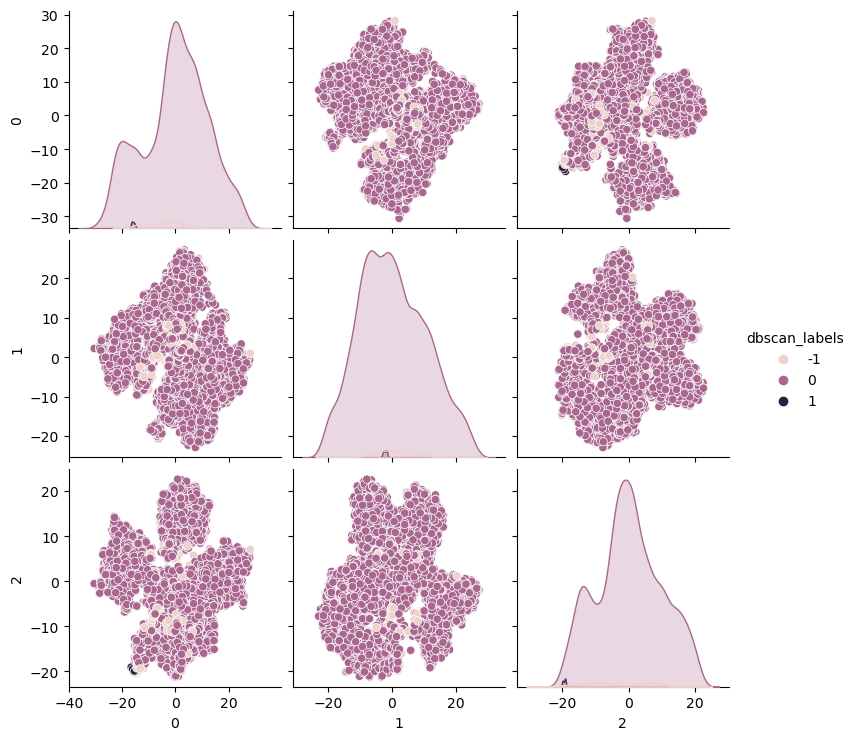

In [152]:
sns.pairplot(df_tsne_dbscan, hue = 'dbscan_labels')

#### Agglomerative clustering

In [157]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [169]:
linkage_object = linkage(df_scaled, "ward")

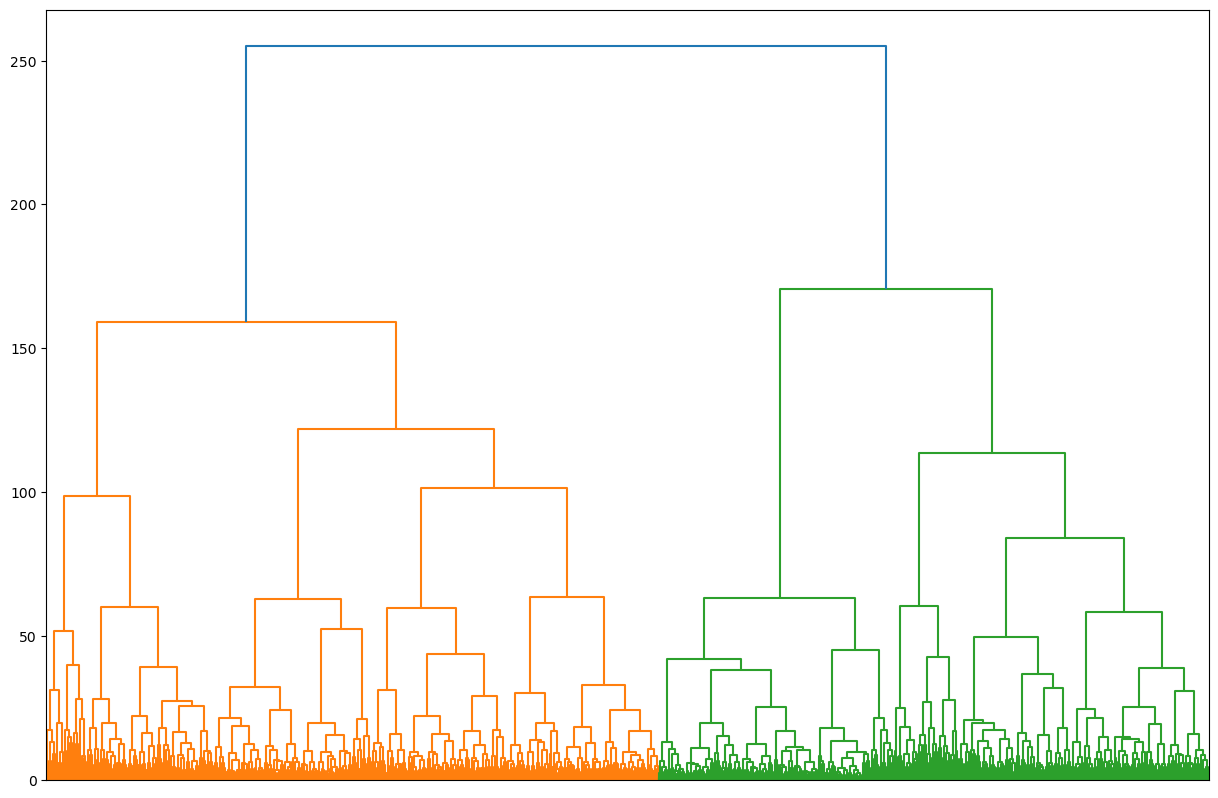

In [170]:
plt.figure(figsize=(15,10))
dendrogram(linkage_object)
plt.xticks([])
plt.show()

In [171]:
clusters = []
sil_scores = []
for i in range(2,12):
    model = AgglomerativeClustering(n_clusters=i)
    clusters.append(i)
    sil_scores.append(silhouette_score(df_scaled,  model.fit_predict(df_scaled)))

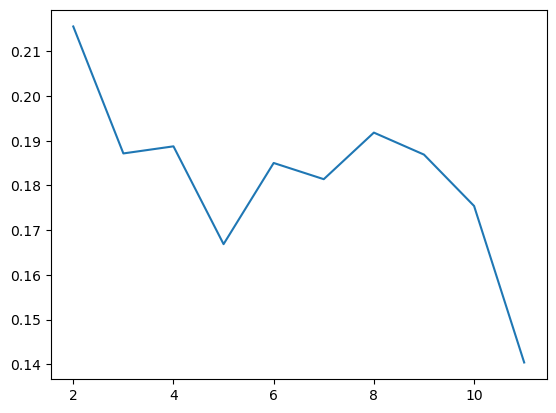

In [173]:
plt.plot(clusters, sil_scores)

In [174]:
agglo_model = AgglomerativeClustering(n_clusters=2, "ward")
aggl_labels = agglo_model.fit_predict(df_scaled)

In [175]:
df_agglo = df_scaled.copy()
df_agglo['agglo_labels'] = aggl_labels

In [176]:
df_agglo.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,agglo_labels
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,-1.205498,-0.149181,-0.113732,-0.987198,0.394362,-0.930636,-0.747076,-0.732543,-0.674357,-0.724294,-0.810038,-0.579693,-1.447095,-0.825080,-0.488435,-0.556409,0.347127,1
C10002,0.948821,0.179354,-1.680213,-0.987198,-1.087586,1.528788,-1.302995,-0.732543,-0.958359,0.699585,0.784546,-1.379434,0.925997,1.065109,0.794350,0.391881,0.347127,0
C10003,0.824885,0.492603,0.600600,1.061910,-1.087586,-0.930636,1.196721,2.466616,-0.958359,-0.724294,-0.810038,0.487735,1.010161,-0.119646,0.456478,-0.556409,0.347127,1
C10004,0.624529,-0.858641,0.827395,1.265665,-1.087586,0.564410,-1.014336,-0.363114,-0.958359,-0.213543,-0.123288,-0.874853,1.010161,-4.163779,-3.608423,-0.556409,0.347127,1
C10005,0.271106,0.492603,-0.708741,-0.114417,-1.087586,-0.930636,-1.014336,-0.363114,-0.958359,-0.724294,-0.810038,-0.874853,-1.224854,-0.065306,-0.135631,-0.556409,0.347127,1


In [177]:
df_tsne_agglo = df_tsne.copy()
df_tsne_agglo['agglo_labels'] = aggl_labels

In [178]:
df_tsne_agglo.head()

,0,1,2,agglo_labels
0,3.971367,-21.202141,-6.331325,1
1,-15.771673,3.063262,9.148125,0
2,11.258486,-5.073921,14.942862,1
3,-14.248615,-0.659682,-17.673500,1
4,-0.154994,-8.201741,21.324173,1


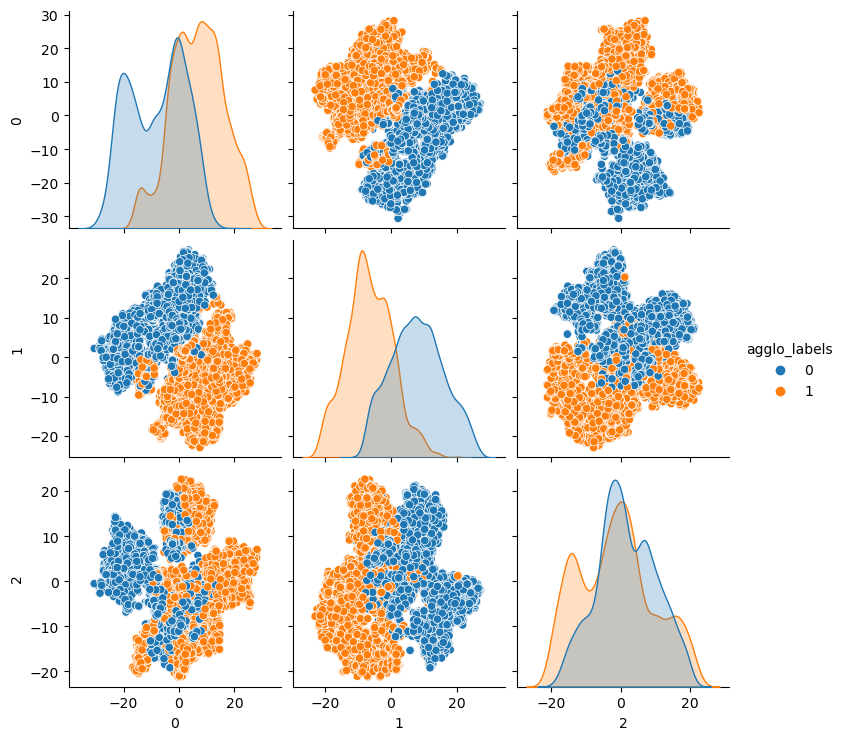

In [179]:
sns.pairplot(df_tsne_agglo, hue = 'agglo_labels')

### FRom clustering
- More hyperparameter tuning can be done
- AS of now 2 clusters for
    - Agglomertative clustering
    - Kmeans visually look good

## Comparing the Found Groups

We now need to explore the clusters. We will look at:
- How similar are the results for the different clustering algorithms?
- For each clustering result, what are the main differences between the found groups? 
- Are the found groups statistically different from each other?
- Based on the exploration of the clusters, what are the characteristics of each group? Do they represent some type of customer?

In [181]:
df_agglo.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,agglo_labels
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,-1.205498,-0.149181,-0.113732,-0.987198,0.394362,-0.930636,-0.747076,-0.732543,-0.674357,-0.724294,-0.810038,-0.579693,-1.447095,-0.825080,-0.488435,-0.556409,0.347127,1
C10002,0.948821,0.179354,-1.680213,-0.987198,-1.087586,1.528788,-1.302995,-0.732543,-0.958359,0.699585,0.784546,-1.379434,0.925997,1.065109,0.794350,0.391881,0.347127,0
C10003,0.824885,0.492603,0.600600,1.061910,-1.087586,-0.930636,1.196721,2.466616,-0.958359,-0.724294,-0.810038,0.487735,1.010161,-0.119646,0.456478,-0.556409,0.347127,1
C10004,0.624529,-0.858641,0.827395,1.265665,-1.087586,0.564410,-1.014336,-0.363114,-0.958359,-0.213543,-0.123288,-0.874853,1.010161,-4.163779,-3.608423,-0.556409,0.347127,1
C10005,0.271106,0.492603,-0.708741,-0.114417,-1.087586,-0.930636,-1.014336,-0.363114,-0.958359,-0.724294,-0.810038,-0.874853,-1.224854,-0.065306,-0.135631,-0.556409,0.347127,1


In [186]:
temp_df = df_agglo.groupby('agglo_labels').mean().reset_index()

In [189]:
temp_df

,agglo_labels,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,0.534719,0.220042,-0.522659,-0.186120,-0.427969,0.954784,-0.481165,-0.187086,-0.398677,0.763591,0.845814,-0.461698,0.020109,0.216935,0.412507,-0.367003,-0.154003
1,1,-0.479740,-0.197417,0.468919,0.166983,0.383965,-0.856614,0.431692,0.167850,0.357685,-0.685079,-0.758847,0.414226,-0.018041,-0.194630,-0.370093,0.329268,0.138169


In [190]:
grouped_agglo = temp_df.melt(id_vars='agglo_labels').sort_values('value')

<AxesSubplot:xlabel='value', ylabel='variable'>

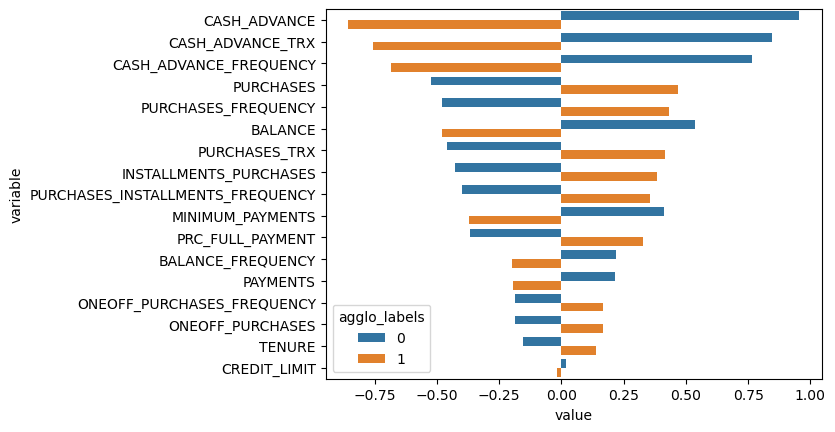

In [191]:
sns.barplot(x = 'value',
           y = 'variable', 
           hue = 'agglo_labels', 
           data =  grouped_agglo)

#### Difference of means analysis for each of the features for different labels predicted by model

In [193]:
df_kmeans.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,kmeans_labels
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,-1.205498,-0.149181,-0.113732,-0.987198,0.394362,-0.930636,-0.747076,-0.732543,-0.674357,-0.724294,-0.810038,-0.579693,-1.447095,-0.825080,-0.488435,-0.556409,0.347127,0
C10002,0.948821,0.179354,-1.680213,-0.987198,-1.087586,1.528788,-1.302995,-0.732543,-0.958359,0.699585,0.784546,-1.379434,0.925997,1.065109,0.794350,0.391881,0.347127,1
C10003,0.824885,0.492603,0.600600,1.061910,-1.087586,-0.930636,1.196721,2.466616,-0.958359,-0.724294,-0.810038,0.487735,1.010161,-0.119646,0.456478,-0.556409,0.347127,0
C10004,0.624529,-0.858641,0.827395,1.265665,-1.087586,0.564410,-1.014336,-0.363114,-0.958359,-0.213543,-0.123288,-0.874853,1.010161,-4.163779,-3.608423,-0.556409,0.347127,1
C10005,0.271106,0.492603,-0.708741,-0.114417,-1.087586,-0.930636,-1.014336,-0.363114,-0.958359,-0.724294,-0.810038,-0.874853,-1.224854,-0.065306,-0.135631,-0.556409,0.347127,1


In [195]:
temp_df = df_kmeans.groupby('kmeans_labels').mean().reset_index()

In [196]:
temp_df

,kmeans_labels,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,-0.256833,-0.056813,0.563789,0.286077,0.483495,-0.515282,0.548623,0.275280,0.453747,-0.439689,-0.470373,0.542055,0.026547,-0.006570,-0.135819,0.210557,0.071784
1,1,0.487708,0.107884,-1.070597,-0.543240,-0.918124,0.978485,-1.041797,-0.522738,-0.861634,0.834939,0.893206,-1.029326,-0.050411,0.012477,0.257912,-0.399834,-0.136313


In [197]:
grouped_kmeans = temp_df.melt(id_vars='kmeans_labels').sort_values('value')

<AxesSubplot:xlabel='value', ylabel='variable'>

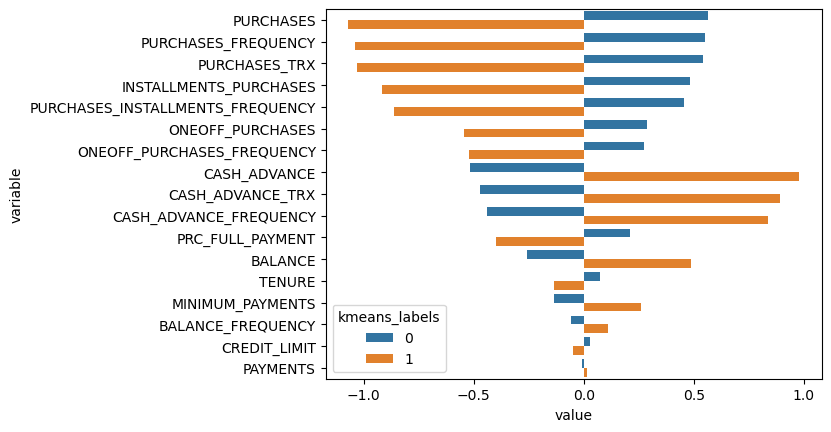

In [200]:
sns.barplot(x = 'value',
           y = 'variable', 
           hue = 'kmeans_labels', 
           data =  grouped_kmeans)

### Summary based on difference in means analysis for each feature based on cluster labels assigned 

**Group 0**
- more Balance, cash advance, 
- less purchase and purchase freq
- more payments, more credit limit(not sure if it's significant)
- and so on.. 

**Group 1**
- mostly vice versa



### compare two algorithms 

In [199]:
adjusted_rand_score(df_kmeans['kmeans_labels'], df_agglo['agglo_labels'])

0.44378446863733706

### stats 

In [218]:
stats_df = pd.DataFrame()

In [219]:
stats_df['feature'] = df_scaled.columns

In [220]:
stats_df

,feature
0,BALANCE
1,BALANCE_FREQUENCY
2,PURCHASES
3,ONEOFF_PURCHASES
4,INSTALLMENTS_PURCHASES
5,CASH_ADVANCE
6,PURCHASES_FREQUENCY
7,ONEOFF_PURCHASES_FREQUENCY
8,PURCHASES_INSTALLMENTS_FREQUENCY
9,CASH_ADVANCE_FREQUENCY


In [221]:
stats_df["p_kmeans"] = np.full(len(stats_df.feature), np.nan)

In [222]:
stats_df["p_agglo"] = np.full(len(stats_df.feature), np.nan)

In [223]:
stats_df

,feature,p_kmeans,p_agglo
0,BALANCE,NaN,NaN
1,BALANCE_FREQUENCY,NaN,NaN
2,PURCHASES,NaN,NaN
3,ONEOFF_PURCHASES,NaN,NaN
4,INSTALLMENTS_PURCHASES,NaN,NaN
5,CASH_ADVANCE,NaN,NaN
6,PURCHASES_FREQUENCY,NaN,NaN
7,ONEOFF_PURCHASES_FREQUENCY,NaN,NaN
8,PURCHASES_INSTALLMENTS_FREQUENCY,NaN,NaN
9,CASH_ADVANCE_FREQUENCY,NaN,NaN


In [208]:
df_kmeans.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,kmeans_labels
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,-1.205498,-0.149181,-0.113732,-0.987198,0.394362,-0.930636,-0.747076,-0.732543,-0.674357,-0.724294,-0.810038,-0.579693,-1.447095,-0.825080,-0.488435,-0.556409,0.347127,0
C10002,0.948821,0.179354,-1.680213,-0.987198,-1.087586,1.528788,-1.302995,-0.732543,-0.958359,0.699585,0.784546,-1.379434,0.925997,1.065109,0.794350,0.391881,0.347127,1
C10003,0.824885,0.492603,0.600600,1.061910,-1.087586,-0.930636,1.196721,2.466616,-0.958359,-0.724294,-0.810038,0.487735,1.010161,-0.119646,0.456478,-0.556409,0.347127,0
C10004,0.624529,-0.858641,0.827395,1.265665,-1.087586,0.564410,-1.014336,-0.363114,-0.958359,-0.213543,-0.123288,-0.874853,1.010161,-4.163779,-3.608423,-0.556409,0.347127,1
C10005,0.271106,0.492603,-0.708741,-0.114417,-1.087586,-0.930636,-1.014336,-0.363114,-0.958359,-0.724294,-0.810038,-0.874853,-1.224854,-0.065306,-0.135631,-0.556409,0.347127,1


In [207]:
from scipy import stats

In [ ]:
p_values = []
for column in df_scaled.columns:
    label_0  = df_kmeans.loc[df_kmeans['kmeans_labels']==0,column]
    label_1  = df_kmeans.loc[df_kmeans['kmeans_labels']==1,column]
    
    p_value = stats.ttest_ind(label_0, label_1)[1]
    print(p_value)

    p_values.append(p_value)

In [228]:
stats_df[ 'p_kmeans'] = p_values

In [229]:
stats_df

,feature,p_kmeans,p_agglo
0,BALANCE,2.362385e-262,NaN
1,BALANCE_FREQUENCY,1.203187e-13,NaN
2,PURCHASES,0.000000e+00,NaN
3,ONEOFF_PURCHASES,0.000000e+00,NaN
4,INSTALLMENTS_PURCHASES,0.000000e+00,NaN
5,CASH_ADVANCE,0.000000e+00,NaN
6,PURCHASES_FREQUENCY,0.000000e+00,NaN
7,ONEOFF_PURCHASES_FREQUENCY,3.136475e-304,NaN
8,PURCHASES_INSTALLMENTS_FREQUENCY,0.000000e+00,NaN
9,CASH_ADVANCE_FREQUENCY,0.000000e+00,NaN


In [230]:
df_agglo.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,agglo_labels
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,-1.205498,-0.149181,-0.113732,-0.987198,0.394362,-0.930636,-0.747076,-0.732543,-0.674357,-0.724294,-0.810038,-0.579693,-1.447095,-0.825080,-0.488435,-0.556409,0.347127,1
C10002,0.948821,0.179354,-1.680213,-0.987198,-1.087586,1.528788,-1.302995,-0.732543,-0.958359,0.699585,0.784546,-1.379434,0.925997,1.065109,0.794350,0.391881,0.347127,0
C10003,0.824885,0.492603,0.600600,1.061910,-1.087586,-0.930636,1.196721,2.466616,-0.958359,-0.724294,-0.810038,0.487735,1.010161,-0.119646,0.456478,-0.556409,0.347127,1
C10004,0.624529,-0.858641,0.827395,1.265665,-1.087586,0.564410,-1.014336,-0.363114,-0.958359,-0.213543,-0.123288,-0.874853,1.010161,-4.163779,-3.608423,-0.556409,0.347127,1
C10005,0.271106,0.492603,-0.708741,-0.114417,-1.087586,-0.930636,-1.014336,-0.363114,-0.958359,-0.724294,-0.810038,-0.874853,-1.224854,-0.065306,-0.135631,-0.556409,0.347127,1


In [207]:
from scipy import stats

In [231]:
p_values = []
for column in df_scaled.columns:
    label_0  = df_agglo.loc[df_agglo['agglo_labels']==0,column]
    label_1  = df_agglo.loc[df_agglo['agglo_labels']==1,column]
    
    p_value = stats.ttest_ind(label_0, label_1)[1]
    print(p_value)

    p_values.append(p_value)

0.0
2.1004466304748258e-88
0.0
2.1864543848253274e-63
0.0
0.0
0.0
4.881047978471079e-64
2.7744419157633503e-301
0.0
0.0
0.0
0.07159008009681955
6.3135868267634945e-86
0.0
1.4688472046263112e-252
9.411637550450525e-44


In [232]:
stats_df[ 'p_agglo'] = p_values

In [233]:
stats_df[]

,feature,p_kmeans,p_agglo
0,BALANCE,2.362385e-262,0.000000e+00
1,BALANCE_FREQUENCY,1.203187e-13,2.100447e-88
2,PURCHASES,0.000000e+00,0.000000e+00
3,ONEOFF_PURCHASES,0.000000e+00,2.186454e-63
4,INSTALLMENTS_PURCHASES,0.000000e+00,0.000000e+00
5,CASH_ADVANCE,0.000000e+00,0.000000e+00
6,PURCHASES_FREQUENCY,0.000000e+00,0.000000e+00
7,ONEOFF_PURCHASES_FREQUENCY,3.136475e-304,4.881048e-64
8,PURCHASES_INSTALLMENTS_FREQUENCY,0.000000e+00,2.774442e-301
9,CASH_ADVANCE_FREQUENCY,0.000000e+00,0.000000e+00


In [237]:
THRESHOLD = 0.05/stats_df.shape[0]
print(THRESHOLD)

stats_df.query('p_kmeans >= @THRESHOLD')

0.0029411764705882353


,feature,p_kmeans,p_agglo
13,PAYMENTS,0.391766,6.313587e-86


In [238]:
stats_df.query('p_agglo >= @THRESHOLD')

,feature,p_kmeans,p_agglo
12,CREDIT_LIMIT,0.000537,0.07159


## Findings

How would you describe the found groups? What kind of value proposition can this clustering provide?

There are two main groups of customers in our dataset:
* One group seems to borrow more money, incur larger balances, makes purchases less frequently but uses cash advances more commonly. However they also make higher minimum payments, and their credit limit is high. They are using their credit to its fullest. 

* The second group employs a more conservative approach and has a very low balance and high purchase frequency. They don't tend to use the full extent of their credit, and as such, they have a lower credit limit.

    * For this second group, perhaps we can create a marketing campaign to encourage them to take full advantage on their credit limit. They would be able to afford larger purchases, and as such will pay more in interest on their credit.

<div id="container" style="position:relative;">
<div style="position:relative; float:right"><img style="height:25px""width: 50px" src ="https://drive.google.com/uc?export=view&id=14VoXUJftgptWtdNhtNYVm6cjVmEWpki1" />
</div>
</div>